In [9]:
img_path = "input.jpg"

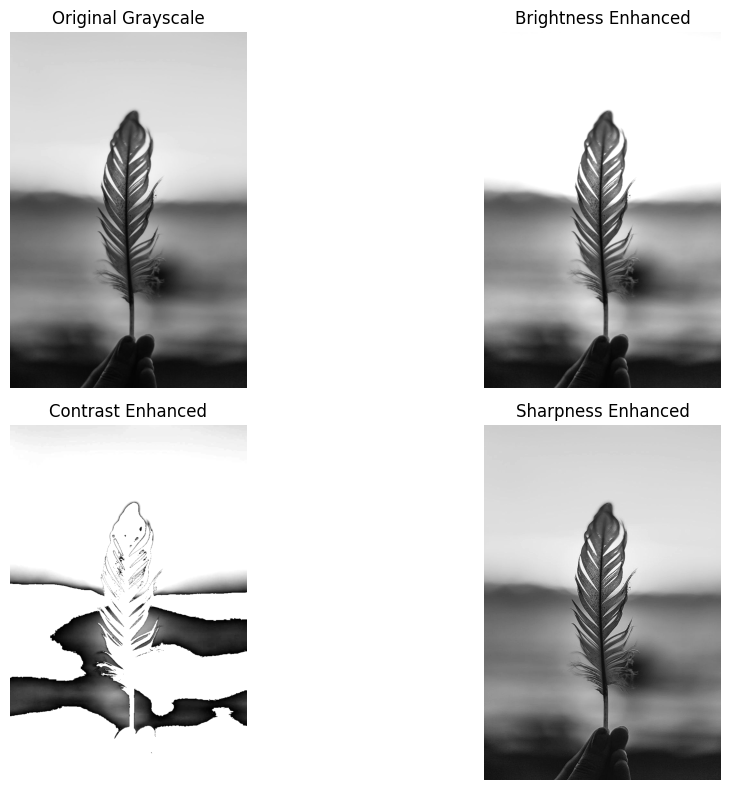

In [10]:
# question 1 (color to grayscale)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 1. Brightness enhancement
c = 50  # example brightness value, you can change this
bright = cv2.add(gray, c)

# 2. Contrast enhancement
a = 1.5  # contrast factor
contrast = a * (gray - 128) + 128
contrast = np.clip(contrast, 0, 255).astype(np.uint8)

# 3. Sharpness enhancement using the kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharp = cv2.filter2D(gray, -1, kernel)

# Plotting the results
titles = ['Original Grayscale', 'Brightness Enhanced', 'Contrast Enhanced', 'Sharpness Enhanced']
images = [gray, bright, contrast, sharp]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


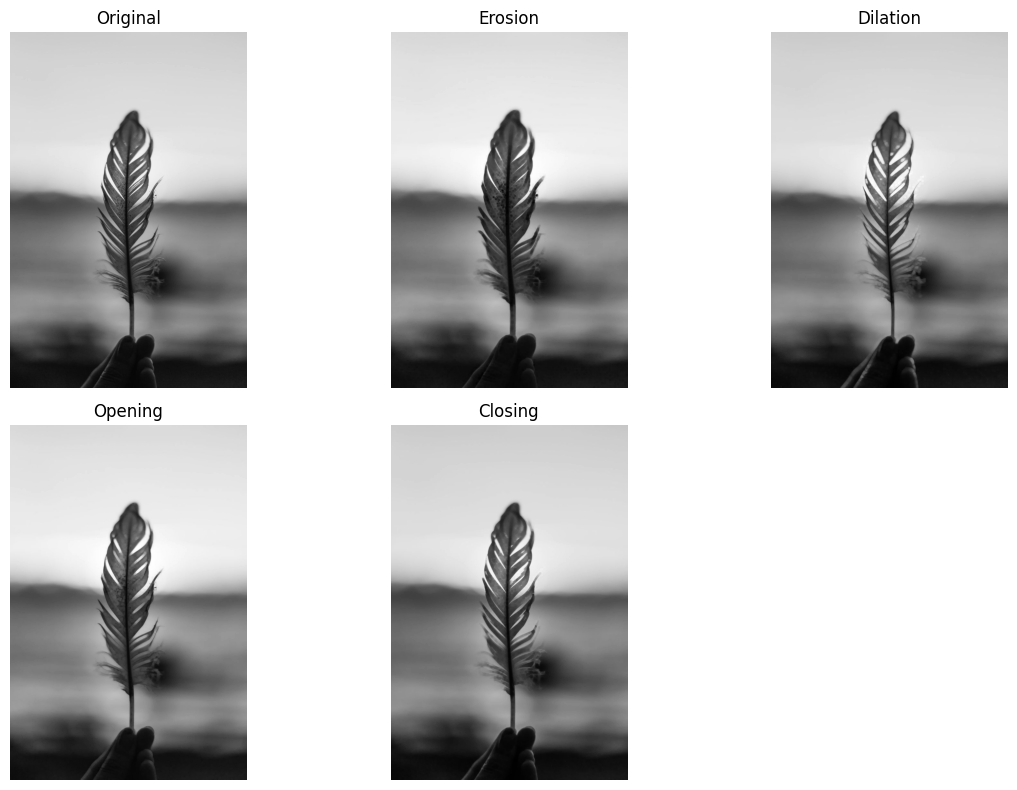

In [11]:
# question2(erosion ,dilation,opening,closing)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# a) Erosion
erosion = cv2.erode(image, kernel, iterations=1)

# b) Dilation
dilation = cv2.dilate(image, kernel, iterations=1)

# c) Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# d) Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [image, erosion, dilation, opening, closing]

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


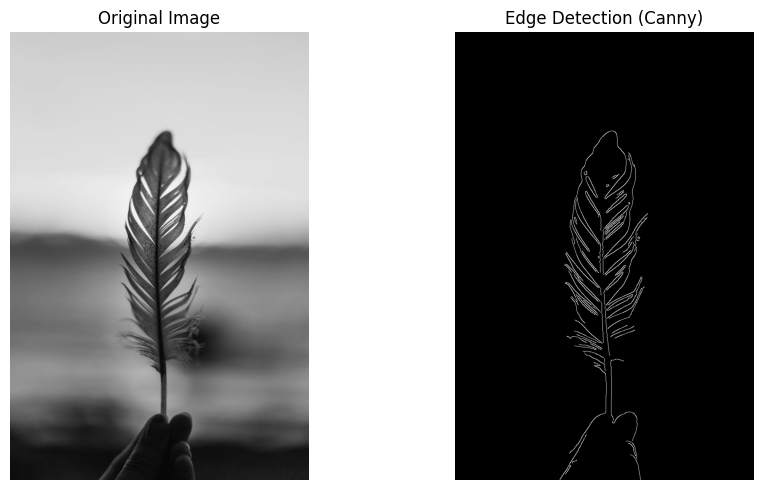

In [12]:
# question 3(edge detection)
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise before edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detector
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipykernel_45966/409311201.py:23: RuntimeWarning: overflow encountered in scalar add
  c = 255 / (np.log(1 + np.max(image1)))
/tmp/ipykernel_45966/409311201.py:23: RuntimeWarning: divide by zero encountered in log
  c = 255 / (np.log(1 + np.max(image1)))
/tmp/ipykernel_45966/409311201.py:24: RuntimeWarning: divide by zero encountered in log
  log_transform = c * np.log(1 + image1)
/tmp/ipykernel_45966/409311201.py:24: RuntimeWarning: invalid value encountered in multiply
  log_transform = c * np.log(1 + image1)
/tmp/ipykernel_45966/409311201.py:25: RuntimeWarning: invalid value encountered in cast
  log_transform = np.array(log_transform, dtype=np.uint8)


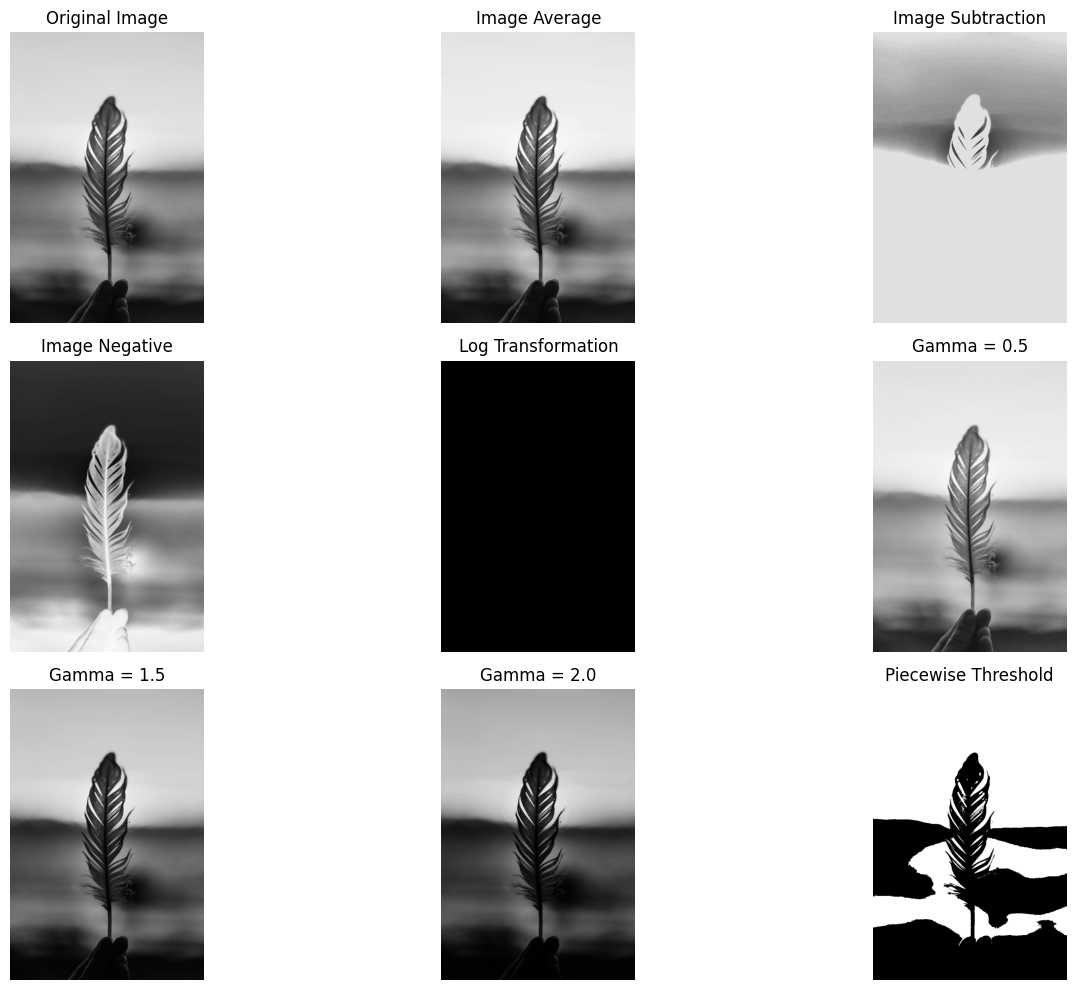

In [13]:
# question 4(image averaging,subtraction,negative,log transformation,powerlaw,piecewise)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images for average and subtraction
image1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("input2.jpg", cv2.IMREAD_GRAYSCALE)

# Ensure both images are of the same size
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# a) Image Average
average = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)

# b) Image Subtraction
subtraction = cv2.absdiff(image1, image2)

# c) Image Negative
negative = 255 - image1

# d) Log Transformation
c = 255 / (np.log(1 + np.max(image1)))
log_transform = c * np.log(1 + image1)
log_transform = np.array(log_transform, dtype=np.uint8)

# e) Power Law Transformation (Gamma Correction)
gamma_values = [0.5, 1.5, 2.0]
gamma_results = []
for gamma in gamma_values:
    gamma_corrected = ((image1 / 255) ** gamma) * 255
    gamma_corrected = np.array(gamma_corrected, dtype=np.uint8)
    gamma_results.append((gamma, gamma_corrected))

# f) Piecewise Transformation (Example: Thresholding)
_, piecewise = cv2.threshold(image1, 128, 255, cv2.THRESH_BINARY)

# Displaying the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(average, cmap='gray')
plt.title("Image Average")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(subtraction, cmap='gray')
plt.title("Image Subtraction")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(negative, cmap='gray')
plt.title("Image Negative")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(log_transform, cmap='gray')
plt.title("Log Transformation")
plt.axis('off')

for i, (gamma, img) in enumerate(gamma_results):
    plt.subplot(3, 3, 6 + i)
    plt.imshow(img, cmap='gray')
    plt.title(f"Gamma = {gamma}")
    plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(piecewise, cmap='gray')
plt.title("Piecewise Threshold")
plt.axis('off')

plt.tight_layout()
plt.show()


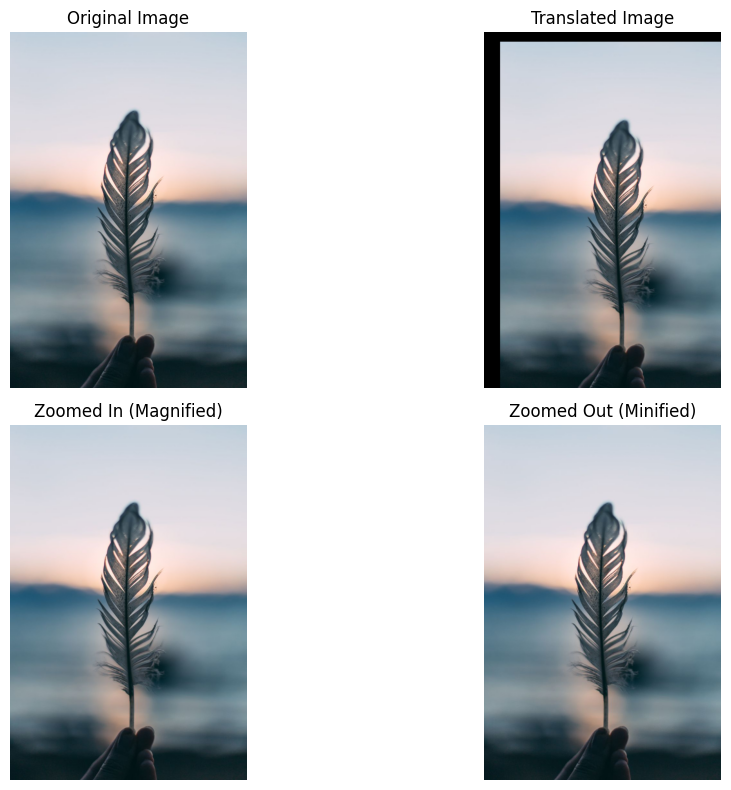

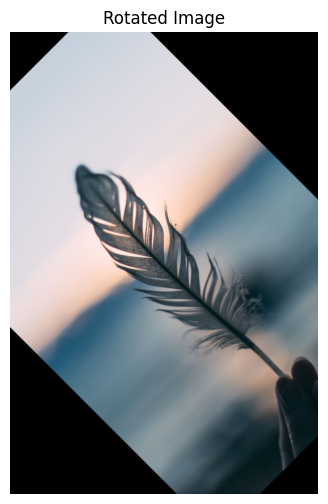

In [14]:
# question 5(translation,zooming,rotation)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rows, cols = image.shape[:2]

# A. Translation (Shift by tx and ty)
tx, ty = 50, 30  # Shift values in pixels
M_translation = np.float32([[1, 0, tx], [0, 1, ty]])
translated = cv2.warpAffine(image, M_translation, (cols, rows))

# B. Zooming
# Magnifying by 1.5 times
scale_up = 1.5
zoomed_up = cv2.resize(image, None, fx=scale_up, fy=scale_up, interpolation=cv2.INTER_LINEAR)

# Minifying by 0.5 times
scale_down = 0.5
zoomed_down = cv2.resize(image, None, fx=scale_down, fy=scale_down, interpolation=cv2.INTER_AREA)

# C. Rotation
angle = 45  # Degrees
M_rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated = cv2.warpAffine(image, M_rotate, (cols, rows))

# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(translated)
plt.title("Translated Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(zoomed_up)
plt.title("Zoomed In (Magnified)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(zoomed_down)
plt.title("Zoomed Out (Minified)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Show rotated image separately due to size difference
plt.figure(figsize=(6,6))
plt.imshow(rotated)
plt.title("Rotated Image")
plt.axis('off')
plt.show()


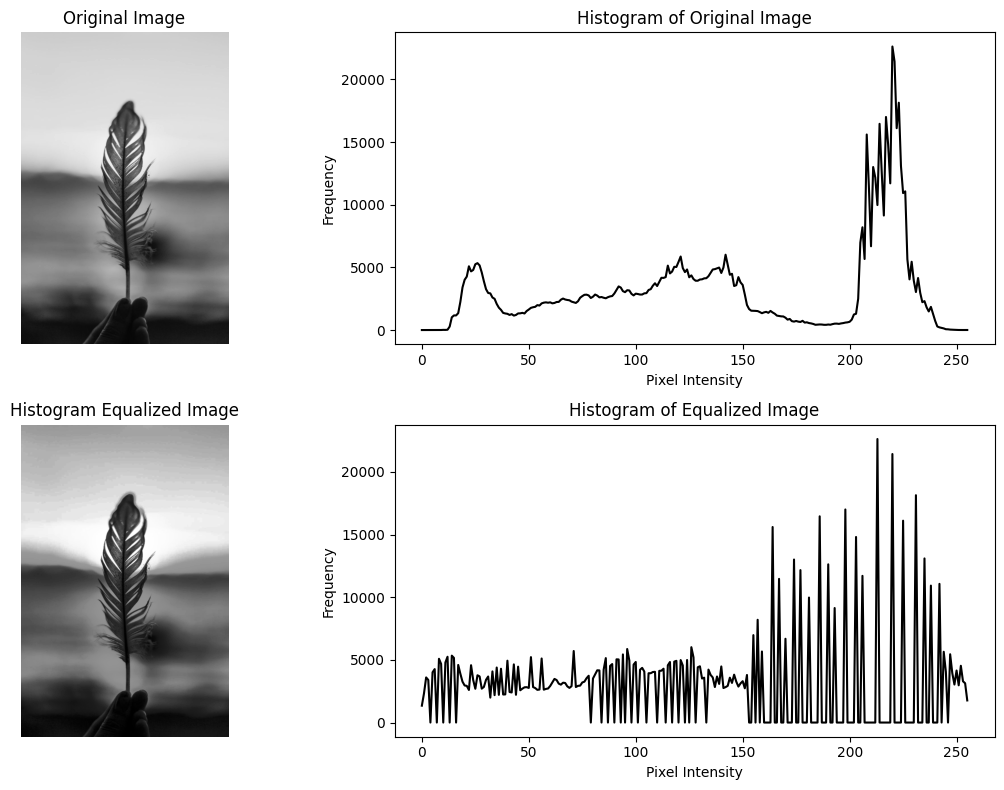

In [15]:
# question 6(histogram)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Histogram of original image
hist_original = cv2.calcHist([image], [0], None, [256], [0,256])

# Perform histogram equalization
equalized = cv2.equalizeHist(image)

# Histogram of equalized image
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0,256])

# Display the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of original image
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

# Histogram of equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
